<a href="https://colab.research.google.com/github/pzoliveira/IGTI_DESM1/blob/main/IGTI_DESM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando as bibliotecas

In [ ]:
import pandas as pd

In [ ]:
pd.__version__

'1.5.3'

#Carregando os datasets

In [ ]:
dados_clinicos = pd.read_csv('dados_clinicos.csv', sep=';', encoding='latin-1')
dados_clinicos.head(5)

,id_cliente,peso,colesterol,genero
0,1,102.0,111,Masculino
1,2,115.0,135,Masculino
2,3,115.0,136,Masculino
3,4,140.0,167,Feminino
4,5,130.0,158,Masculino


In [ ]:
dados_pacientes = pd.read_csv('dados_pacientes.csv', sep=';', encoding='latin-1')
dados_pacientes.head(5)

,ï»¿id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor PÃºblico,Ensino MÃ©dio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,AutÃ´nomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,15,Casado,Negro,0.0,3430


In [ ]:
estado_regiao = pd.read_csv('estado_regiao.csv', sep=';', encoding='latin-1')
estado_regiao.head(5)

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


#Analisando os datasets: eliminar dados duplicados e corrigir ausentes

##dados_clinicos

In [ ]:
dados_clinicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  590 non-null    int64  
 1   peso        585 non-null    float64
 2   colesterol  590 non-null    int64  
 3   genero      590 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 18.6+ KB


In [ ]:
dados_clinicos.describe()

,id_cliente,peso,colesterol
count,590.000000,585.000000,590.000000
mean,283.696610,143.158974,170.067797
std,156.464182,30.925402,39.325409
min,1.000000,95.000000,102.000000
25%,148.250000,116.000000,135.250000
50%,295.500000,140.000000,169.000000
75%,424.750000,171.000000,207.750000
max,547.000000,203.000000,235.000000


In [ ]:
dados_clinicos.duplicated().sum()

43

In [ ]:
dados_clinicos = dados_clinicos.drop_duplicates()

In [ ]:
dados_clinicos.count()

id_cliente    547
peso          542
colesterol    547
genero        547
dtype: int64

In [ ]:
dados_clinicos.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
dtype: int64

In [ ]:
dados_clinicos.loc[dados_clinicos['peso'].isnull()]

,id_cliente,peso,colesterol,genero
63,64,NaN,211,Masculino
101,102,NaN,230,Feminino
146,147,NaN,171,Masculino
195,196,NaN,143,Feminino
215,216,NaN,180,Masculino


In [ ]:
dados_clinicos = dados_clinicos.dropna()

In [ ]:
dados_clinicos.peso.isna().sum()

0

##dados_pacientes

In [ ]:
dados_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ï»¿id_cliente    7999 non-null   int64  
 1   idade            7999 non-null   int64  
 2   classe_trabalho  7612 non-null   object 
 3   escolaridade     7999 non-null   object 
 4   id_estado        7999 non-null   int64  
 5   estado_civil     7999 non-null   object 
 6   raca             7999 non-null   object 
 7   qtde_filhos      7989 non-null   float64
 8   salario          7999 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 562.6+ KB


In [ ]:
dados_pacientes.describe()

,ï»¿id_cliente,idade,id_estado,qtde_filhos,salario
count,7999.000000,7999.000000,7999.000000,7989.000000,7999.000000
mean,4000.000000,38.477060,14.094012,2.405432,3169.312664
std,2309.256735,13.568667,7.821634,1.703916,3055.862493
min,1.000000,17.000000,1.000000,0.000000,0.000000
25%,2000.500000,28.000000,7.000000,1.000000,1100.000000
50%,4000.000000,37.000000,14.000000,2.000000,2410.000000
75%,5999.500000,47.000000,21.000000,4.000000,3640.500000
max,7999.000000,90.000000,27.000000,5.000000,19994.000000


In [ ]:
dados_pacientes.duplicated().sum()

0

In [ ]:
dados_pacientes.isna().sum()

ï»¿id_cliente        0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos         10
salario              0
dtype: int64

In [ ]:
dados_pacientes.classe_trabalho.value_counts()

FuncionÃ¡rio Setor Privado    5382
AutÃ´nomo                      588
EmpresÃ¡rio                    496
Servidor PÃºblico              299
MEI                            275
Aposentado                     267
FuncionÃ¡rio PÃºblico          216
Menor Aprendiz                  85
Desempregado                     3
EstagiÃ¡rio                      1
Name: classe_trabalho, dtype: int64

In [ ]:
dados_pacientes.classe_trabalho.fillna('FuncionÃ¡rio Setor Privado', inplace=True)

In [ ]:
media_arred = round(dados_pacientes.qtde_filhos.mean(), 0)
dados_pacientes.qtde_filhos.fillna(media_arred, inplace=True)

In [ ]:
dados_pacientes.isna().sum()

ï»¿id_cliente      0
idade              0
classe_trabalho    0
escolaridade       0
id_estado          0
estado_civil       0
raca               0
qtde_filhos        0
salario            0
dtype: int64

##estado_regiao

In [ ]:
estado_regiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  27 non-null     int64 
 1   sigla      27 non-null     object
 2   estado     27 non-null     object
 3   regiao     27 non-null     object
 4   pais       27 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [ ]:
estado_regiao.count()

id_estado    27
sigla        27
estado       27
regiao       27
pais         27
dtype: int64

In [ ]:
estado_regiao.duplicated().sum()

0

In [ ]:
estado_regiao.isna().sum()

id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64

#Criando código de gênero

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
dados_clinicos['cod_genero'] = LE.fit_transform(dados_clinicos['genero'])

dados_clinicos.head(5)

,id_cliente,peso,colesterol,genero,cod_genero
0,1,102.0,111,Masculino,1
1,2,115.0,135,Masculino,1
2,3,115.0,136,Masculino,1
3,4,140.0,167,Feminino,0
4,5,130.0,158,Masculino,1


#Fazendo a integração dos dados

In [ ]:
print(dados_clinicos.count(), '\n', '\n', dados_pacientes.count(), '\n', '\n', estado_regiao.count())

id_cliente    542
peso          542
colesterol    542
genero        542
cod_genero    542
dtype: int64 
 
 ï»¿id_cliente      7999
idade              7999
classe_trabalho    7999
escolaridade       7999
id_estado          7999
estado_civil       7999
raca               7999
qtde_filhos        7999
salario            7999
dtype: int64 
 
 id_estado    27
sigla        27
estado       27
regiao       27
pais         27
dtype: int64


In [ ]:
dados_pacientes.rename(columns={'ï»¿id_cliente' : 'id_cliente'}, inplace=True)

In [ ]:
dados_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       7999 non-null   int64  
 1   idade            7999 non-null   int64  
 2   classe_trabalho  7999 non-null   object 
 3   escolaridade     7999 non-null   object 
 4   id_estado        7999 non-null   int64  
 5   estado_civil     7999 non-null   object 
 6   raca             7999 non-null   object 
 7   qtde_filhos      7999 non-null   float64
 8   salario          7999 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 562.6+ KB


In [ ]:
clientes_clinicos = pd.merge(dados_clinicos, dados_pacientes, on='id_cliente')

In [ ]:
clientes_clinicos

,id_cliente,peso,colesterol,genero,cod_genero,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,102.0,111,Masculino,1,39,Servidor PÃºblico,Ensino MÃ©dio Completo,2,Solteiro,Branco,2.0,4754
1,2,115.0,135,Masculino,1,50,AutÃ´nomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,115.0,136,Masculino,1,38,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,140.0,167,Feminino,0,53,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,24,Casado,Negro,1.0,1100
4,5,130.0,158,Masculino,1,28,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,15,Casado,Negro,0.0,3430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,172.0,207,Masculino,1,46,AutÃ´nomo,Ensino MÃ©dio Completo,9,Divorciado,Branco,1.0,3533
538,544,129.0,157,Masculino,1,36,AutÃ´nomo,Ensino MÃ©dio Incompleto,5,Separado,Branco,1.0,1100
539,545,107.0,115,Masculino,1,72,Aposentado,Ensino MÃ©dio Incompleto,1,ViÃºvo,Branco,1.0,4110
540,546,117.0,147,Masculino,1,35,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,5,Casado,Negro,2.0,1100


In [ ]:
base_completa = pd.merge(clientes_clinicos, estado_regiao, on='id_estado')

In [ ]:
base_completa.sort_values('id_cliente').reset_index(drop=True)
base_completa

,id_cliente,peso,colesterol,genero,cod_genero,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais
0,1,102.0,111,Masculino,1,39,Servidor PÃºblico,Ensino MÃ©dio Completo,2,Solteiro,Branco,2.0,4754,AL,Alagoas,Nordeste,Brasil
1,27,108.0,123,Feminino,0,19,EstagiÃ¡rio,Ensino MÃ©dio Incompleto,2,Solteiro,Branco,2.0,1100,AL,Alagoas,Nordeste,Brasil
2,111,131.0,162,Masculino,1,38,FuncionÃ¡rio Setor Privado,Mestrado,2,Casado,Branco,4.0,6836,AL,Alagoas,Nordeste,Brasil
3,144,175.0,214,Masculino,1,70,Aposentado,Ensino MÃ©dio Completo,2,Solteiro,Branco,4.0,2616,AL,Alagoas,Nordeste,Brasil
4,153,100.0,107,Masculino,1,21,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,2,Solteiro,Branco,3.0,1100,AL,Alagoas,Nordeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,279,132.0,161,Feminino,0,24,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,20,Casado,Branco,2.0,3627,RN,Rio Grande do Norte,Nordeste,Brasil
538,281,116.0,141,Feminino,0,42,EmpresÃ¡rio,Ensino MÃ©dio Completo,20,Casado,Branco,1.0,6407,RN,Rio Grande do Norte,Nordeste,Brasil
539,288,174.0,214,Feminino,0,25,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,20,Solteiro,Branco,4.0,2759,RN,Rio Grande do Norte,Nordeste,Brasil
540,424,118.0,135,Feminino,0,36,FuncionÃ¡rio PÃºblico,Mestrado,20,Solteiro,Branco,4.0,7855,RN,Rio Grande do Norte,Nordeste,Brasil


#Criando algoritmo de clusterização KMeans

In [ ]:
#Importando a biblioteca do SciKitLearning
import sklearn
from sklearn.cluster import KMeans

In [ ]:
dados_interesse = base_completa[['peso', 'colesterol']]

In [ ]:
dados_interesse

,peso,colesterol
0,102.0,111
1,108.0,123
2,131.0,162
3,175.0,214
4,100.0,107
...,...,...
537,132.0,161
538,116.0,141
539,174.0,214
540,118.0,135


In [ ]:
sklearn.__version__

'1.2.2'

In [44]:
kmeans_interesse = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10)
base_completa['cluster'] = kmeans_interesse.fit_predict(dados_interesse)

In [45]:
centroides = kmeans_interesse.cluster_centers_
centroides

array([[141.96174863, 173.22404372],
       [110.4       , 125.88947368],
       [182.18934911, 217.        ]])

In [ ]:
#Importando as bibliotecas gráficas
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [55]:
def pltdisp(xis, ypsilon, group):
  grafico = px.scatter(x=base_completa[xis], y=base_completa[ypsilon], color=base_completa[group])
  figura = go.Figure(data = grafico.data)
  figura.update_layout(title='Gráfico de Dispersão', xaxis_title=xis, yaxis_title=ypsilon)
  figura.show()

In [56]:
pltdisp('colesterol', 'peso', 'cluster')

# Respondendo as questões técnicas e práticas do trabalho

##Criando histogramas

In [47]:
import matplotlib.pyplot as plt

In [51]:
dados_SE = base_completa.loc[base_completa['regiao']=='Sudeste']
dados_SE

,id_cliente,peso,colesterol,genero,cod_genero,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,sigla,estado,regiao,pais,cluster
100,8,145.0,176,Feminino,0,52,AutÃ´nomo,Ensino MÃ©dio Incompleto,13,Casado,Branco,4.0,1100,MG,Minas Gerais,Sudeste,Brasil,0
101,57,157.0,196,Feminino,0,46,FuncionÃ¡rio Setor Privado,Ensino Fundamental Incompleto,13,Casado,Branco,5.0,1100,MG,Minas Gerais,Sudeste,Brasil,0
102,85,102.0,111,Masculino,1,53,FuncionÃ¡rio Setor Privado,PÃ³s-Graduado,13,Divorciado,Branco,4.0,6480,MG,Minas Gerais,Sudeste,Brasil,1
103,94,97.0,106,Masculino,1,34,EmpresÃ¡rio,Ensino MÃ©dio Completo,13,Casado,Branco,3.0,4426,MG,Minas Gerais,Sudeste,Brasil,1
104,97,124.0,149,Masculino,1,37,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,13,Casado,Branco,4.0,2107,MG,Minas Gerais,Sudeste,Brasil,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,323,110.0,128,Masculino,1,29,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,19,Solteiro,Branco,3.0,1100,RJ,Rio de Janeiro,Sudeste,Brasil,1
380,355,188.0,223,Masculino,1,38,FuncionÃ¡rio PÃºblico,Ensino MÃ©dio Incompleto,19,Casado,Branco,5.0,1144,RJ,Rio de Janeiro,Sudeste,Brasil,2
381,467,115.0,139,Masculino,1,22,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Completo,19,Solteiro,Branco,3.0,2341,RJ,Rio de Janeiro,Sudeste,Brasil,1
382,526,152.0,193,Masculino,1,36,FuncionÃ¡rio Setor Privado,Ensino MÃ©dio Incompleto,19,Casado,Negro,1.0,1100,RJ,Rio de Janeiro,Sudeste,Brasil,0


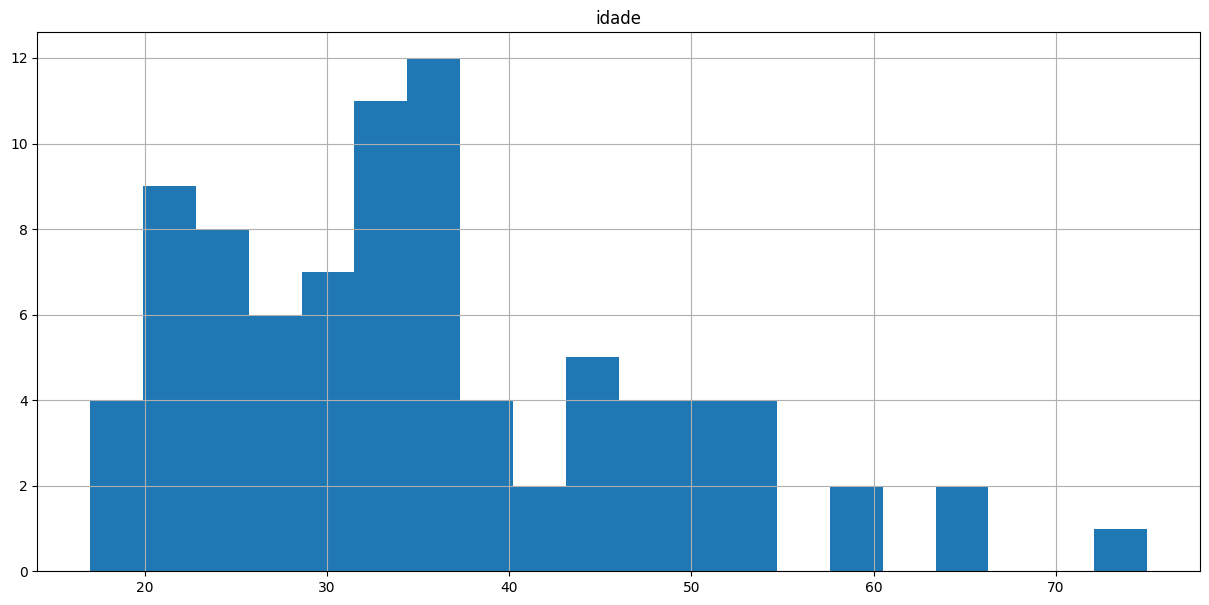

In [52]:
dados_SE.hist(column='idade', figsize=(15, 7), bins=20)
plt.show()

In [58]:
#Exibindo gráfico de dispersão
pltdisp('salario', 'idade', 'cod_genero')

In [61]:
dados_NE = base_completa.loc[base_completa['regiao']=='Nordeste']
dados_NE.salario.mean()

3434.845238095238

In [69]:
dados_NE.loc[dados_NE['estado']=='Paraíba'].idade.mean()

32.40909090909091

In [70]:
dados_NE.loc[dados_NE['sigla']=='SE'].idade.mean()

39.92

In [71]:
dados_NE.loc[dados_NE['sigla']=='RN'].idade.mean()

41.0

In [72]:
dados_NE.loc[dados_NE['sigla']=='CE'].idade.mean()

42.72222222222222

In [73]:
lista_siglas = ['PB', 'SE', 'RN', 'CE']
for sigla in lista_siglas:
  print(dados_NE.loc[dados_NE['sigla']==sigla].idade.mean())

32.40909090909091
39.92
41.0
42.72222222222222


In [80]:
lista_siglas = ['MG', 'SC', 'SP', 'PE']
acum = 0
estado_esc = ''
for sigla in lista_siglas:
  if acum == 0:
    acum = base_completa.loc[base_completa['sigla']==sigla].loc[base_completa['escolaridade']=='Mestrado'].escolaridade.count()
    estado_esc = sigla
  else:
    aux = base_completa.loc[base_completa['sigla']==sigla].loc[base_completa['escolaridade']=='Mestrado'].escolaridade.count()
    if aux > acum:
      acum = aux
      estado_esc = sigla
print('Estado com maior quantidade de pacientes com mestrado: ', estado_esc)

Estado com maior quantidade de pacientes com mestrado:  SC


In [83]:
base_completa.loc[base_completa['sigla']=='PE'].loc[base_completa['escolaridade']=='Mestrado'].escolaridade.count()

3

In [86]:
kmeans2 = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10)
kmeans2.fit(dados_interesse)
kmeans2.inertia_

138700.76622385823

In [87]:
base_completa.loc[base_completa['cluster']==0].cluster.count()

183

In [88]:
base_completa.loc[base_completa['cluster']==1].cluster.count()

190

In [91]:
base_completa.loc[base_completa['cluster']==2].cluster.count()

169

In [92]:
base_completa.loc[base_completa['cluster']==2].peso.mean()

182.18934911242604

In [93]:
base_completa.loc[base_completa['cluster']==0].idade.mean()

37.21857923497268

In [94]:
base_completa.loc[base_completa['cluster']==1].idade.mean()

38.642105263157895

In [95]:
base_completa.loc[base_completa['cluster']==2].idade.mean()

38.14792899408284

In [96]:
base_completa.loc[base_completa['cluster']==0].salario.mean()

3337.781420765027

In [97]:
base_completa.loc[base_completa['cluster']==1].salario.mean()

3374.2473684210527

In [98]:
base_completa.loc[base_completa['cluster']==2].salario.mean()

3311.98224852071